In [1]:
# Import dependencies
import pandas as pd

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [4]:
X = df.drop('koi_disposition',axis=1)
y = df['koi_disposition']

[0.14021544 0.16081332 0.1313771  0.05030598 0.01698121 0.01651413
 0.01316872 0.01340725 0.02262468 0.02129702 0.01141517 0.01132012
 0.01015198 0.0175339  0.02809686 0.02810506 0.02272901 0.01194055
 0.01386336 0.01200869 0.01092904 0.01136139 0.01283251 0.00916737
 0.00855922 0.00901539 0.0343107  0.00979264 0.01024282 0.0207362
 0.0175173  0.01129375 0.01041808 0.0111369  0.00888014 0.01018085
 0.00898357 0.01109248 0.00978802 0.00989207]


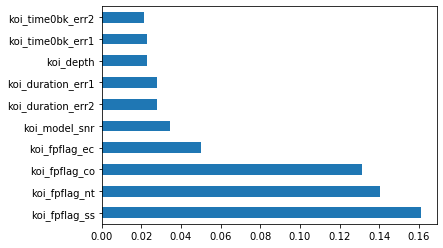

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [6]:
# Set features on the basis of importance
data = df[feat_importances.index]
target = df['koi_disposition']
target_names = ['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Support vector machine linear classifier

from sklearn.svm import SVC 

model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [10]:
# Model Accuracy
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8455082967766546
Testing Data Score: 0.8415331807780321


In [11]:
# Calculate classification report

from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

     CONFIRMED       0.24      0.44      0.31       411
FALSE POSITIVE       0.18      0.09      0.12       484
     CANDIDATE       0.70      0.62      0.66       853

      accuracy                           0.43      1748
     macro avg       0.37      0.38      0.36      1748
  weighted avg       0.45      0.43      0.43      1748



In [12]:
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV model
param_grid = [{'C':[1, 5, 10, 50], 'kernel':['linear']},
             {'C':[1, 5, 10, 50], 'kernel':['rbf'], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}]

grid = GridSearchCV(model, param_grid, verbose=3)

In [13]:
# Train the new model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. C=1, kernel=linear, score=0.858, total=   0.3s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.833, total=   0.3s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.855, total=   0.3s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.832, total=   0.3s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.835, total=   0.3s
[CV] C=5, kernel=linear ..............................................
[CV] .................. C=5, kernel=linear, score=0.875, total=   0.4s
[CV] C=5, kernel=linear ..............................................
[CV] .................. C=5, kernel=linear, score=0.851, total=   0.3s
[CV] C=5, kernel=linear ..............................................
[CV] .................. C=5, kernel=linear, score=0.872, total=   0.3s
[CV] C=5, kernel=linear ..............................................
[CV] .................. C=5, kernel=linear, score=0.850, total=   0.3s
[CV] C=5, kernel=linear ..............................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.505, total=   1.6s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.506, total=   1.5s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.505, total=   1.4s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.506, total=   1.5s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.506, total=   1.4s
[CV] C=10, gamma=0.0005, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0005, kernel=rbf, score=0.742, total=   1.2s
[CV] C=10, gamma=0.0005, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0005, kernel=rbf, score=0.733, total=   1.3s
[CV] C=10, gamma=0.0005, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid=[{'C': [1, 5, 10, 50], 'kernel': ['linear']},
                         {'C': [1, 5, 10, 50],
                          'gamma': [0.0001, 0.0005, 0.001, 0.005],
                          'kernel': ['rbf']}],
             verbose=3)

In [15]:
print(grid.best_params_)
print("Best Score: ", grid.best_score_)

{'C': 50, 'kernel': 'linear'}
Best Score:  0.8823155822702828


In [16]:
import joblib
filename = 'svm.sav'
joblib.dump(grid, filename)

['Sood_svm.sav']